# Exploring Financial Data using Nasdaq Data Link API

In [3]:
#importing necessary libraries together with the config.py file

import requests
import json
import pandas as pd
import config

# configuring the api_key
api_key = ""



In [4]:
# Define the base URL for the API request
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# Define parameters for the API request
api_parameters = {
    'api_key': api_key,         # Authentication key
    'qopts.per_page': 10        # Specify the number of rows per page
}

# Perform the GET request and parse the response as JSON
response = requests.get(api_url, params=api_parameters)
json_data = response.json()

# Output the fetched JSON data
print(json_data)



{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## Processing the JSON Data into a DataFrame

In [7]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# Setup parameters for the API request including the API key and number of results per page
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000  # Fetch up to 10,000 rows at once
}

# Perform the API request and convert the response to JSON
response = requests.get(api_url, params=parameters)
json_data = response.json()

# Extract data and column names from the JSON response
data = json_data['datatable']['data']
columns = [column['name'] for column in json_data['datatable']['columns']]

# Create DataFrame from a list of list
df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


## Understanding the Dataset

In [8]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']


## Filtering the DataFrame for Analysis


In [10]:
# Select only the necessary columns for analysis
df_metric = df_metric[necessary_columns]

# Filter the DataFrame for rows where the 'indicator' column matches 'Accrued Expenses Turnover'
filtered_df = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']

# Describe the statistics for the 'indicator' column in the filtered DataFrame
indicator_stats = filtered_df['indicator'].describe()

# Display the descriptive statistics for the 'indicator' column
print(indicator_stats)



count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object


## Enhancing the DataFrame

In [11]:
def update_country_name(name):
    # Dictionary mapping country codes to full country names
    country_map = {
        'USA': 'United States of America',
        'JPN': 'Japan',
        'CYM': 'Cayman Islands',
        'BHS': 'Bahamas',
        'DEU': 'Germany',
        'IRL': 'Ireland'  # Default value included in mapping
    }
    # Return the full country name if present in the dictionary, else default to 'Ireland'
    return country_map.get(name, 'Ireland')

# Create a deep copy of the DataFrame
filtered_df = filtered_df.copy()

# Update the 'country_name' column using the updated function
filtered_df['country_name'] = filtered_df['country'].apply(update_country_name)

# Reorder and rename the columns as necessary
filtered_df.columns = [
    'report_id', 'report_date', 'report_type',
    'amount', 'company_name', 'country', 'region',
    'indicator', 'statement', 'country_name'
]

# Create a copy of the updated DataFrame
updated_df = filtered_df.copy()

# Display the value counts for the 'country_name' column
print(updated_df['country_name'].value_counts())


United States of America    31
Ireland                     29
Japan                       27
Cayman Islands              27
Bahamas                     19
Germany                      6
Name: country_name, dtype: int64


##  understanding financial trends over time

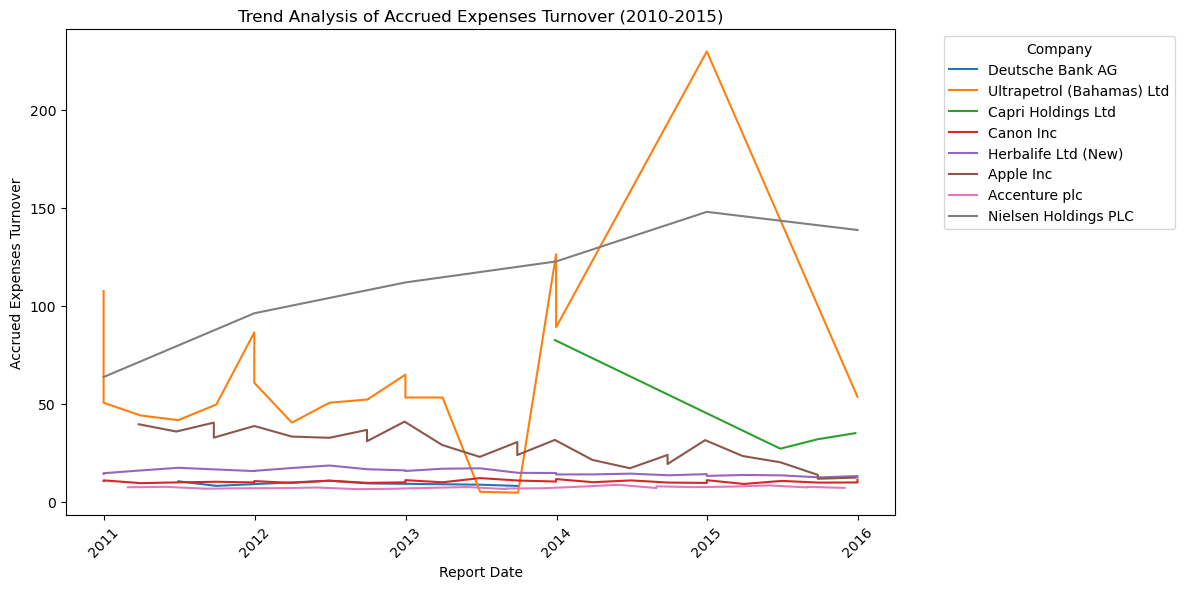

In [12]:

import matplotlib.pyplot as plt

# Convert 'report_date' to datetime format
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])

# Filter data for the time period from 2010 to 2015
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

# Select relevant columns
relevant_data = updated_df[['company_name', 'report_date', 'amount']].copy()

# Set up the plot with a specified figure size
plt.figure(figsize=(12, 6))

# Plot data for each unique company
for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)

# Configure plot aesthetics
plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()




## Geographical Region Analysis



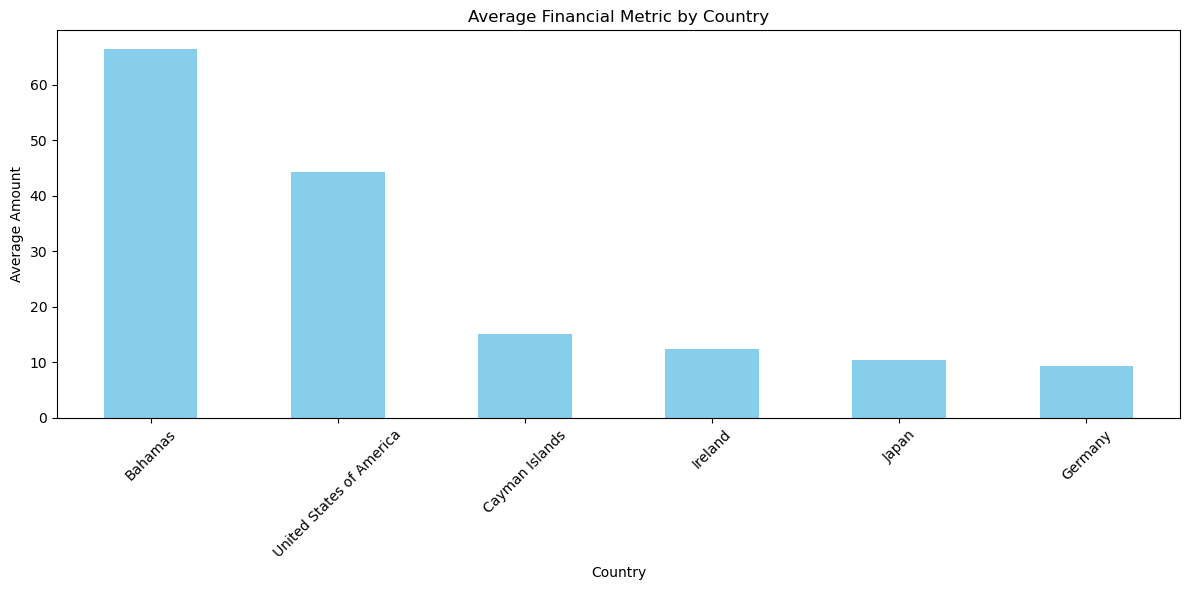

In [13]:
# Calculate the mean 'amount' for each country
country_avg = updated_df.groupby('country_name')['amount'].mean()

# Create a bar plot of the average amounts by country
plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Added a color for aesthetic enhancement

# Set the title and labels of the plot
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout to not cut off labels or titles
plt.tight_layout()

# Display the plot
plt.show()



# Financial Metrics by Country


In [17]:
# Calculate total and median 'amount' for each country
country_stats = updated_df.groupby('country_name')['amount'].agg(['sum', 'median'])

# Display the calculated statistics
print(country_stats)


                                  sum     median
country_name                                    
Bahamas                   1263.792008  53.228953
Cayman Islands             406.641481  14.707964
Germany                     55.733994   9.096293
Ireland                    358.276999   7.367093
Japan                      280.168322  10.244816
United States of America  1375.705133  31.590961


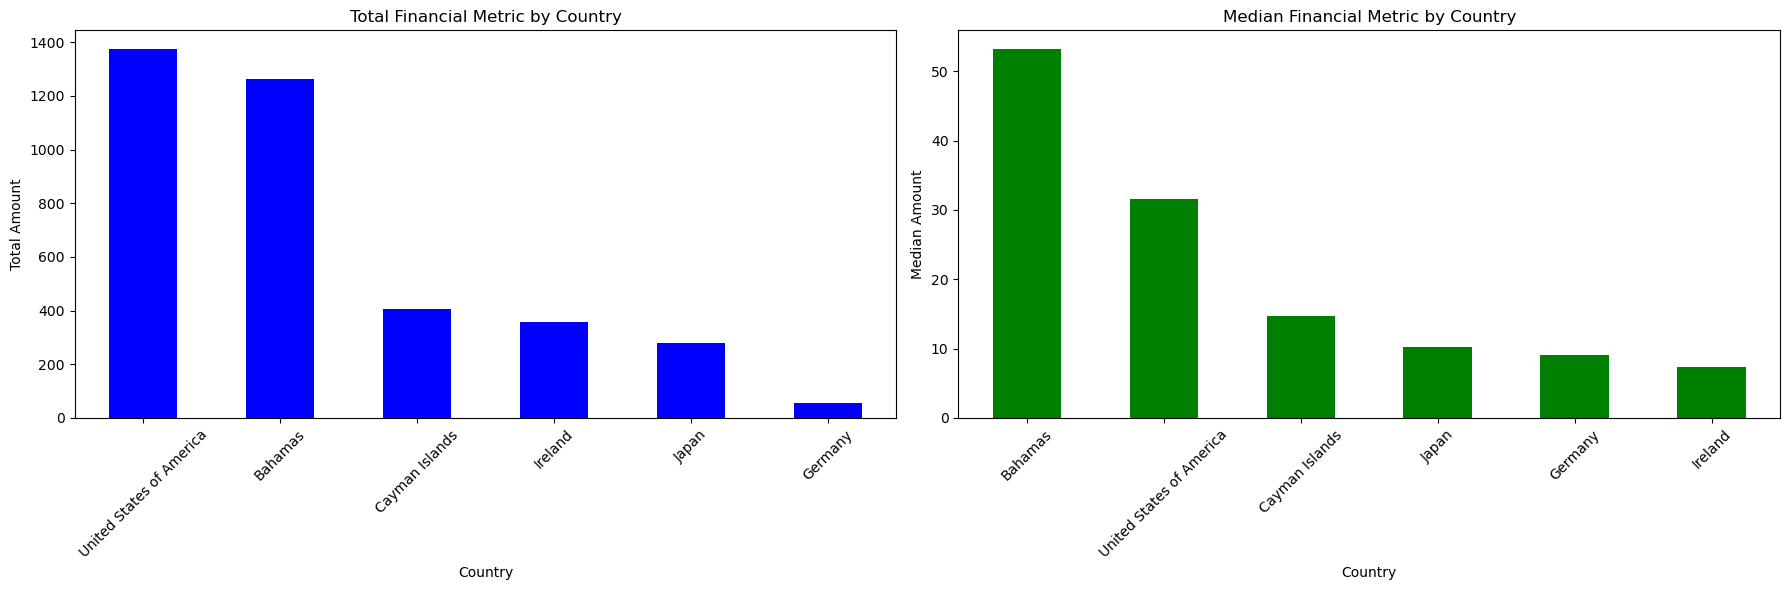

In [18]:

# Set up a subplot environment with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot total amounts by country
country_stats['sum'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='blue', title='Total Financial Metric by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Amount')
axes[0].tick_params(axis='x', rotation=45)

# Plot median amounts by country
country_stats['median'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='green', title='Median Financial Metric by Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Median Amount')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
